In [22]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [23]:
df = pd.read_csv('../data/data_visual.csv',sep=',')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,employee,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,employee,unknown


In [24]:
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [25]:
list_balgroup = []

for i, x in df.iterrows():
    if x['balance'] <= 0 :
        balgroup = '<= 0'
    elif x['balance'] >=1 and x['balance'] <= 286 :
        balgroup = '1 - 286'    
    elif x['balance'] >=287 and x['balance'] <= 572 :
        balgroup = '287 - 572'    
    elif x['balance'] >=573 and x['balance'] <= 857 :
        balgroup = '573 - 857'    
    elif x['balance'] >=858 and x['balance'] <= 1142 :
        balgroup = '858 - 1142'        
    elif x['balance'] >=1143 and x['balance'] <= 1427 :
        balgroup = '1143 - 1427'   
    elif x['balance'] >= 1428   :
        balgroup = '>= 1428'
        
        
    else:
        balgroup = 'unknown'
    list_balgroup.append(balgroup)

df['balgroup'] = list_balgroup

In [26]:
list_agegroup = []

for i, x in df.iterrows():
    if x['age'] >= 18 and x['age'] <= 33:
        agegroup = '18 - 33'
    elif x['age'] >= 34 and x['age'] <= 49:
        agegroup = '34 - 49'
    elif x['age'] >= 50 and x['age'] <= 65:
        agegroup = '50 - 65'
    elif x['age'] >= 66 and x['age'] <= 81:
        agegroup = '66 - 81'      
    elif x['age'] >= 82 and x['age'] <= 97:
        agegroup = '82 - 97'

    list_agegroup.append(agegroup)

df['age_group'] = list_agegroup

# EDA

## Outlier (Distribution of the data)

Almost all numerical data are not normally distributed. Removing outliers from this data is quite risky because of the large amount of it.

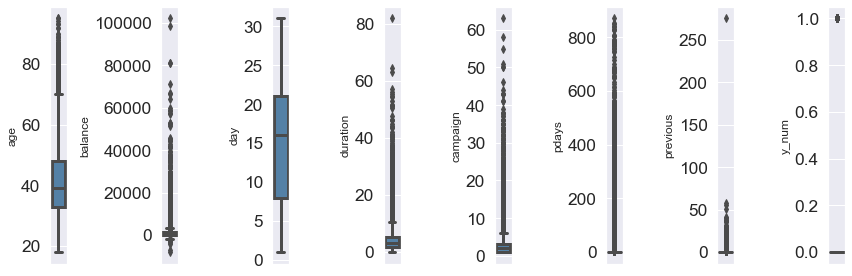

In [27]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='steelblue', orient='v')
    plt.tight_layout()

## Target (Conversion Rate of Campaign)

Target `y` represents the number of customers who opened deposit accounts (conversion rate). Conversion rate of this campaign is around 12%.

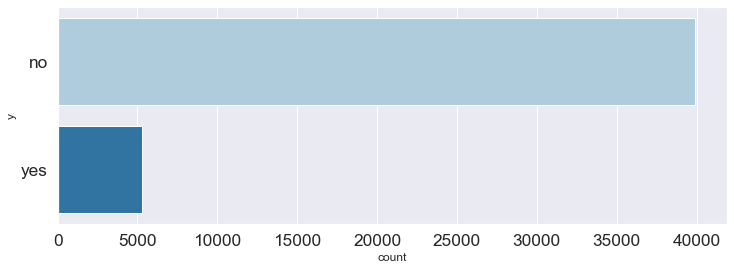

In [28]:
sns.countplot(data=df, y='y', palette='Paired');

## Customer Personal Data

### Age

<AxesSubplot:xlabel='age', ylabel='y'>

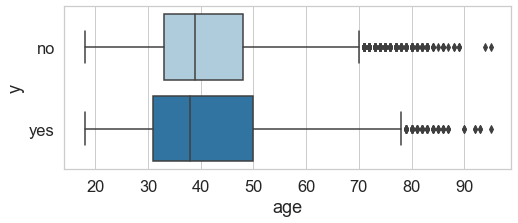

In [29]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=df, x="age", y="y", order = df["y"].value_counts().index, palette='Paired')

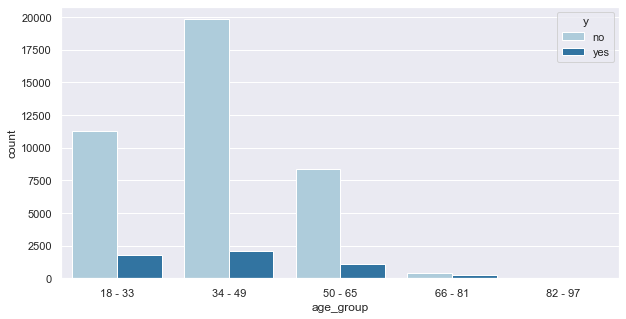

In [30]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="age_group", data = df, hue = "y", palette='Paired', order = ['18 - 33', '34 - 49', '50 - 65','66 - 81', '82 - 97'])
plt.show()

### Job Group

Based on proportion, customers who doesn't have an active income such as 'student', 'retired' and 'unemployed'. 

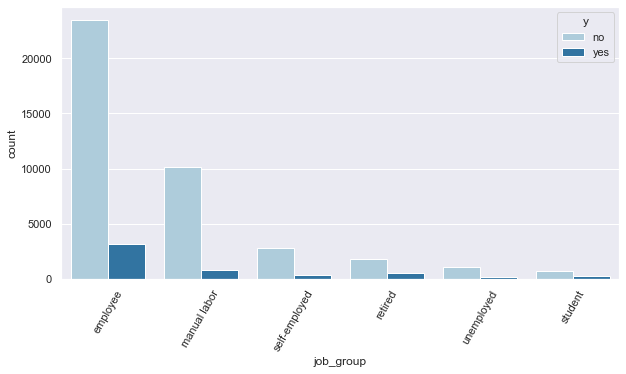

In [31]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="job_group", data = df, hue = "y", order = df["job_group"].value_counts().index, palette="Paired")
job.tick_params(axis='x', rotation=60)
plt.show()

Text(0, 0.5, 'Probability')

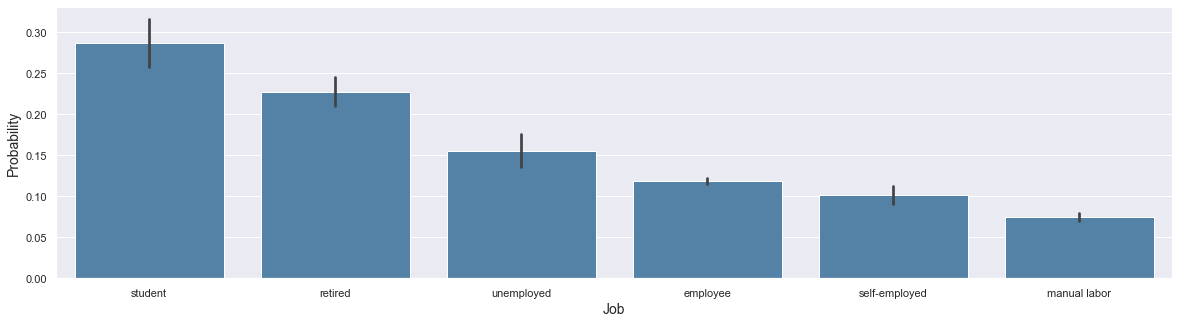

In [32]:
plt.figure( figsize = (20, 5))
sns.barplot(data = df, x = 'job_group', y = 'y_num', color='steelblue', order=['student', 'retired', 'unemployed', 'employee', 'self-employed', 'manual labor'])
plt.xlabel("Job", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

### Marital

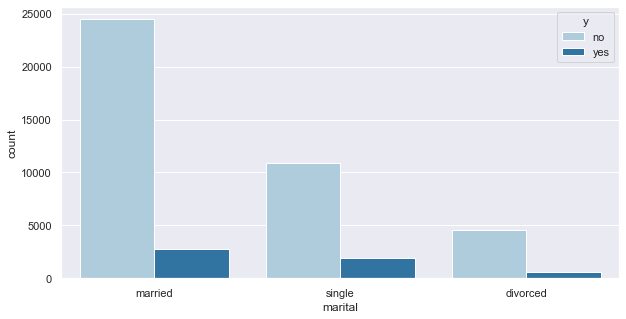

In [33]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
marital = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index, palette="Paired")
plt.show()

Text(0, 0.5, 'Probability')

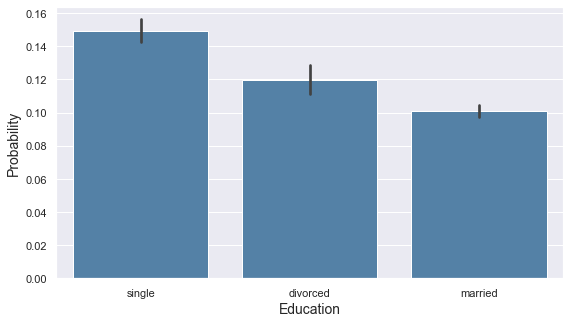

In [34]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'marital', y = 'y_num', color='steelblue', order=['single', 'divorced', 'married'])
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

### Education

Customers with `education` 'secondary' and 'tertiary' have the same numbers of opening deposit account, with 'tertiary' have higher conversion rate.

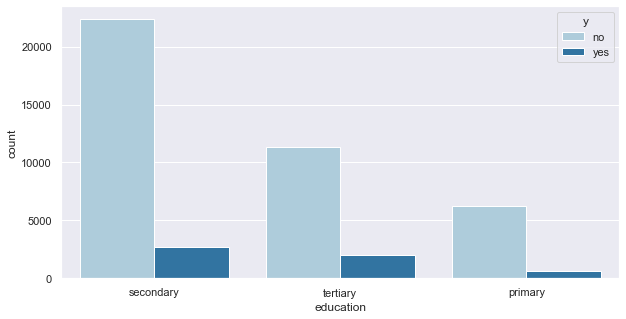

In [35]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index, palette="Paired")
plt.show()

Text(0, 0.5, 'Probability')

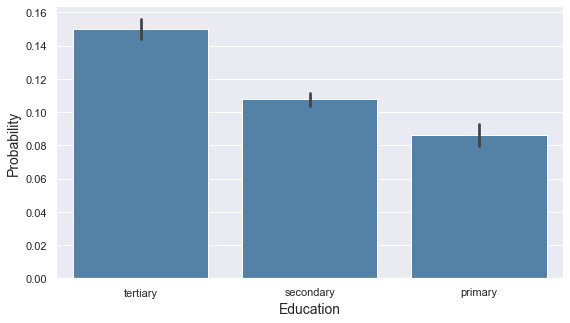

In [36]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'education', y = 'y_num', color='steelblue')
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

## Customer Bank Transaction Data

### Loan - Default - Housing

`loan`, `default`, and `housing` are features that describe the condition of customer's debt to the bank. From these three features, it shows that customers who do not have a `default`, `housing`, or `loan` tend to open a deposit account.

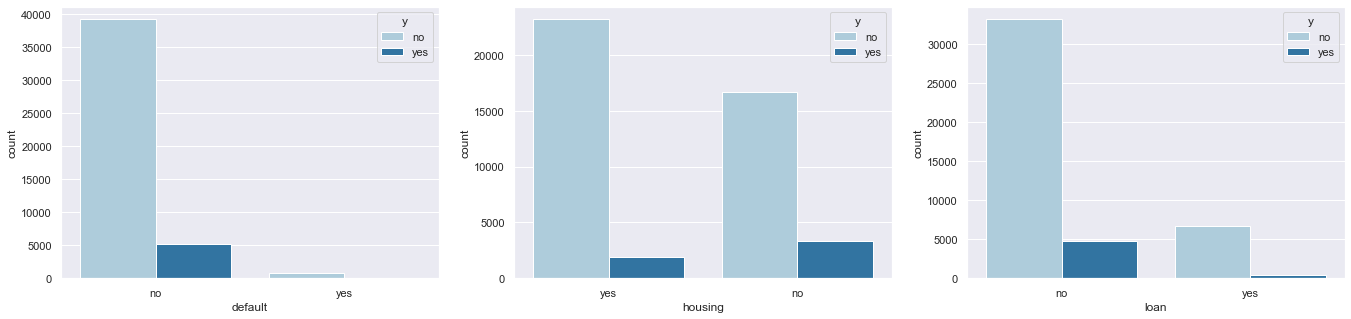

In [37]:
fig, ax = plt.subplots(1,3,figsize=(23, 5))

sns.countplot(data=df, x='default', hue='y', ax = ax[0], palette='Paired')
sns.countplot(data=df, x = 'housing', hue = 'y', ax = ax[1], palette='Paired')
sns.countplot(data=df, x = 'loan', hue = 'y', ax = ax[2], palette='Paired');

### Balance

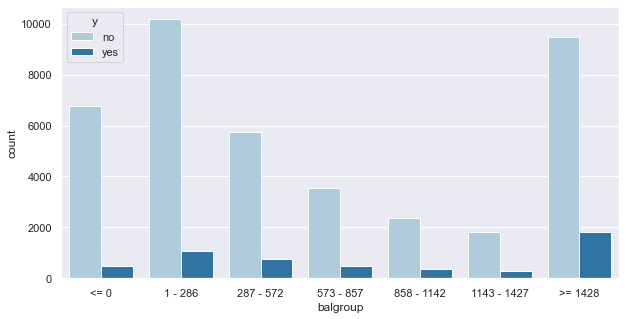

In [38]:
sns.countplot(data=df, x='balgroup', hue='y', palette='Paired', order=['<= 0', '1 - 286', '287 - 572', '573 - 857', '858 - 1142', '1143 - 1427', '>= 1428']);

## Customer Contact Campaign

### Contact

Customers that have been contacted personally with team marketing tend to open a deposit account. Customer that have been contacted with 'cellular' have more in numbers because it is easier to contact people by phone cellular than telephone. When viewed from the proportion between those who open and not open accounts from customers with `contact` 'cellular' and 'telephone', the number between the two is not different. Thus, it can be said that, whether customers are contacted with 'cellular' or 'telephone' did not have any impact on the conversion rate.

<AxesSubplot:xlabel='contact', ylabel='count'>

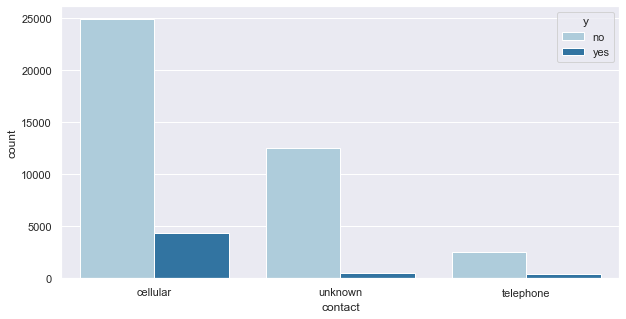

In [39]:
sns.countplot(data=df, x='contact', hue = 'y', palette='Paired', order = df["contact"].value_counts().index)

Text(0, 0.5, 'Probability')

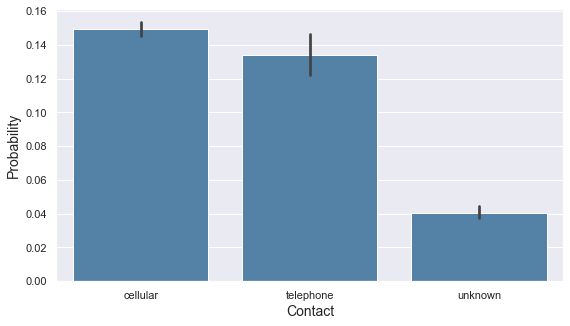

In [40]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'contact', y = 'y_num', color='steelblue', order=['cellular', 'telephone', 'unknown'])
plt.xlabel("Contact", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

### Duration

In [44]:
df_duration = df.loc[(df['duration']>0) & (df['duration']<15)]

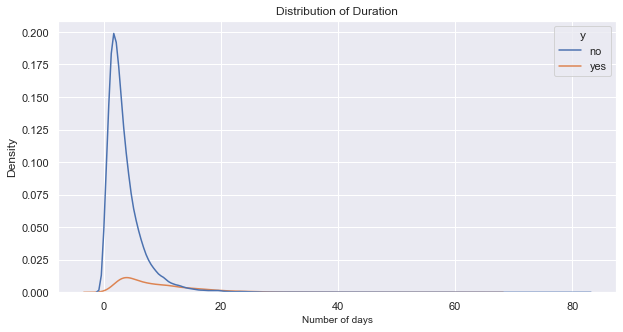

In [48]:
sns.kdeplot(data=df, x='duration', hue='y')

plt.title('Distribution of Duration')
plt.xlabel('Number of days',fontsize=10);

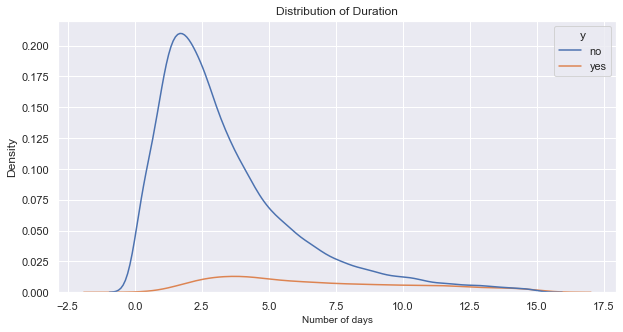

In [49]:
sns.kdeplot(data=df_duration, x='duration', hue='y')

plt.title('Distribution of Duration')
plt.xlabel('Number of days',fontsize=10);

### Month

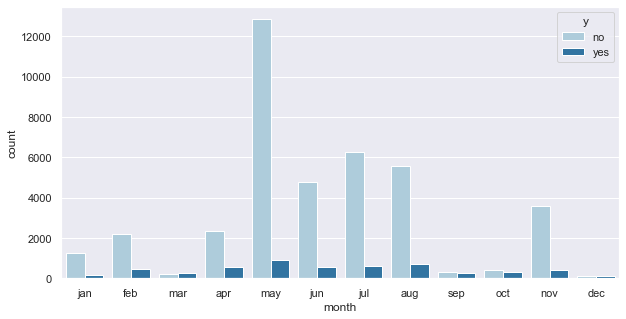

In [57]:
order_month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data = df, x = 'month', hue = 'y', order = order_month, palette='Paired');

### Day

In [63]:
df_md = df.copy()

def day_month(x):
    if x <= 10:
        group = 'beginning'
    elif x <= 20:
        group = 'middle'
    else:
        group = 'end'
    return group

df_md['day_month']=df_md.apply(lambda x: day_month(x['day']),axis=1)

df_md = df_md.groupby(['month', 'day_month', 'y'])['job'].count().reset_index()
df_md.columns = ['month', 'day_month', 'y', 'count']

In [65]:
def no_month(x):
    if x == 'jan':
        no_ = 1
    elif x == 'feb':
        no_ = 2
    elif x == 'mar':
        no_ = 3
    elif x == 'apr':
        no_ = 4
    elif x == 'may':
        no_ = 5
    elif x == 'jun':
        no_ = 6
    elif x == 'jul':
        no_ = 7
    elif x == 'aug':
        no_ = 8
    elif x == 'sep':
        no_ = 9
    elif x == 'oct':
        no_ = 10
    elif x == 'nov':
        no_ = 11
    else:
        no_ = 'dec'
    return no_

def no_day(x):
    if x == 'beginning':
        no_ = 1
    elif x == 'middle':
        no_ = 2
    else:
        no_ = 3
    return no_

df_md['month_no']=df_md.apply(lambda x: no_month(x['month']),axis=1)
df_md['day_no']=df_md.apply(lambda x: no_day(x['day_month']),axis=1)

df_sorted = df_md.sort_values( ['month_no', 'day_no'] , ascending=True).reset_index()
df_sorted.drop('index', axis=1, inplace=True)
df_sorted['day_of_month']=df_sorted.apply(lambda x: x['month'] + ' ' + x['day_month'],axis=1)
df_sorted

,month,day_month,y,count,month_no,day_no,day_of_month
0,jan,beginning,no,8,1,1,jan beginning
1,jan,beginning,yes,3,1,1,jan beginning
2,jan,middle,no,49,1,2,jan middle
3,jan,middle,yes,55,1,2,jan middle
4,jan,end,no,1204,1,3,jan end
...,...,...,...,...,...,...,...
67,dec,beginning,yes,46,dec,1,dec beginning
68,dec,middle,no,28,dec,2,dec middle
69,dec,middle,yes,22,dec,2,dec middle
70,dec,end,no,33,dec,3,dec end


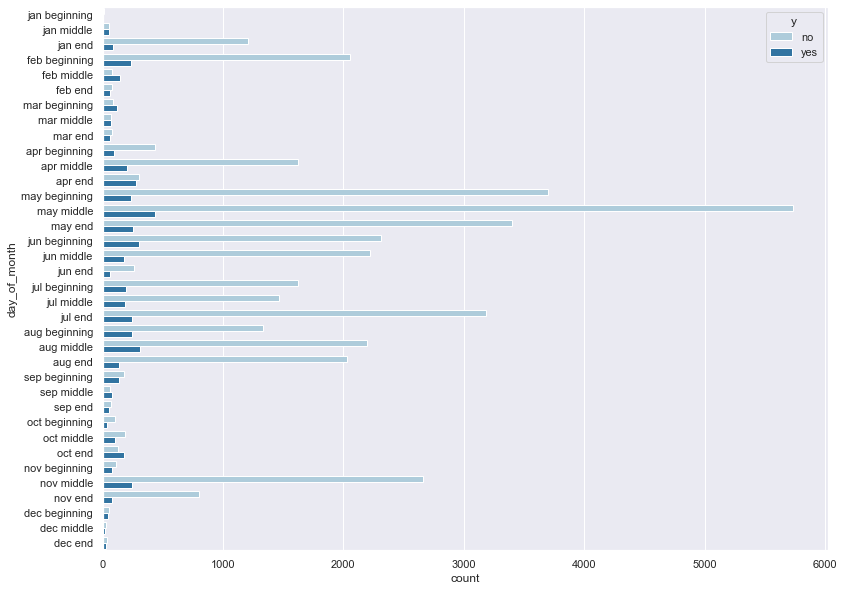

In [66]:
plt.figure(figsize = (13, 10))
sns.barplot(data = df_sorted, x= 'count', y = 'day_of_month', hue = 'y', palette='Paired');

### Campaign (No of contacts performed)

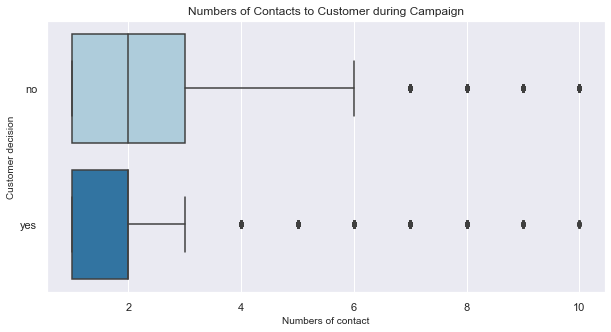

In [68]:
df_campaign = df.loc[df['campaign']<=10] ## Untuk lebih lihat detil sebaran keputusan customer, karena mayoritas yang membuka dihubungi <10 kali

sns.boxplot(data=df_campaign, x='campaign', y='y', palette='Paired')
plt.title('Numbers of Contacts to Customer during Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

## Customer Previous Campaign

### Pdyas (Number of Days Last Contact)

In [50]:
pdays_clean = df.loc[df['pdays']!=-1] ## Exclude orang-orang yang belum pernah dikontak sebelumnya
pdays_yes = pdays_clean.loc[pdays_clean['y']=='yes']
pdays_no = pdays_clean.loc[pdays_clean['y']=='no']

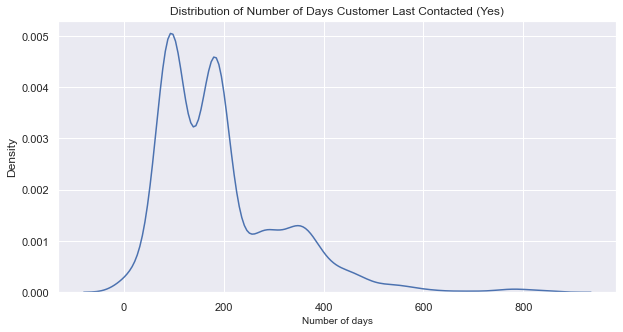

In [51]:
sns.kdeplot(data=pdays_yes, x='pdays', palette='Paired')

plt.title('Distribution of Number of Days Customer Last Contacted (Yes)')
plt.xlabel('Number of days',fontsize=10);

### Previous (Number of Contacts Performed)

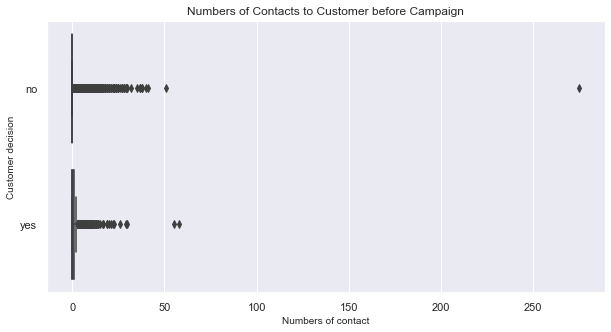

In [55]:
sns.boxplot(data=df, x='previous', y='y', palette='Paired')

plt.title('Numbers of Contacts to Customer before Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

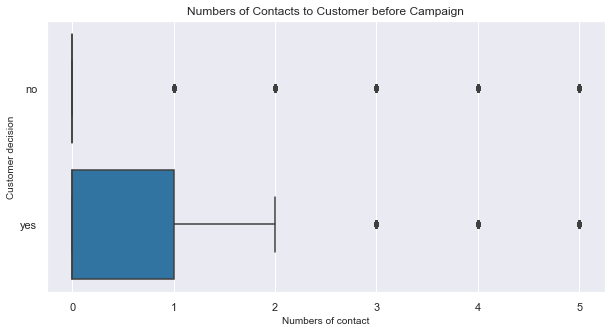

In [54]:
previous_vis = df.loc[df['previous']<=5] ##Untuk melihat lebih rinci sebaran customer pada kategori yes

sns.boxplot(data=previous_vis, x='previous', y='y', palette='Paired')

plt.title('Numbers of Contacts to Customer before Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

### Poutcome (Outcome)

`poutcome` dominated with 'unknown' values, means bank tend to contact new customers who never been exposed to another campaign. However, when viewed from proportion, customers who `success` in previous campaign tend to open an account for this campaign, means customers are satisfied with the product and more likely to subsribe to the next campaign. 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

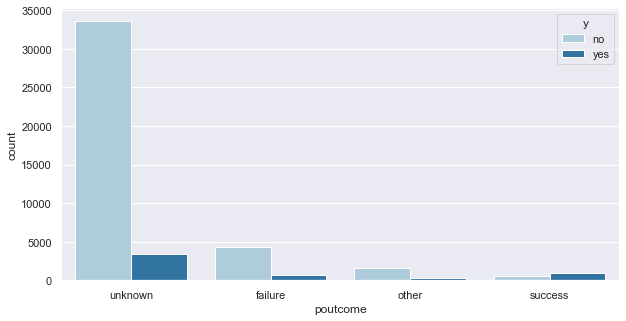

In [46]:
sns.countplot(data=df, x='poutcome', hue = 'y', palette='Paired', order = df["poutcome"].value_counts().index)

Text(0, 0.5, 'Probability')

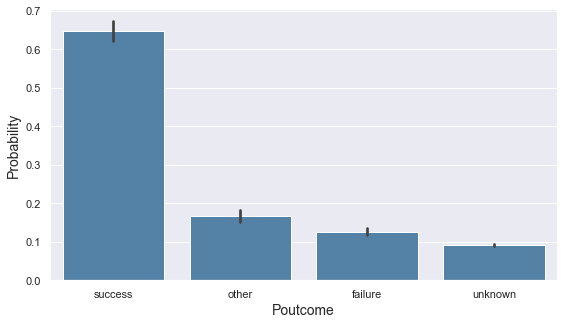

In [47]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'poutcome', y = 'y_num', color='steelblue', order=['success', 'other', 'failure', 'unknown'])
plt.xlabel("Poutcome", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)